<img style="width:100%" src="https://lh3.googleusercontent.com/1KtDnHo8vrJjso7gzfYRqOUOEh2Th5rFsXSQv-XfDc3G4EiFIx-E9IbEahvYAodH9xRVFtdEcOs-KxkPRhuWgniCxqKWTnAFOi6-RJAZ7uyELjwgunLma6RTzlwwC1PS5aoMWPSzvBt_S1DCPEwbKchV7XwIa9A91XS1xkBbcB0RgfFGp20GGxAcR7LcJk56FuaJcSzY_SxPjyqzx_InhrAN3Z1CdKM6A5EkVdnBfqD7ygObifR_zHZVFWUX76dY9uIjL65GvhcPvI-FZBrdbdKbLDvDMERjv6-H_tBTH0ekRW9WhZo3V-bl66cvcyGhkEkE8JKZ6danXsErSiIayrZ7WeJ-GZhjCQgb9IHPc4WLWMJut9UnZI7aoLpgsogN_DSf5yT7TnSN1s_taXbGs2mlNWZ6Rh5RFxWeku1sX9daEAvGWKMBtYp_RXJ75HHnvN-LTv34yJrjsHJsjm9LB4vwfNu0-GVf4ax8xEL5Jei6yOfUfr_xNfsGejJtLpacNWa82A5z4j5pdK0O5FSmgqHhxoAqW-x-LExGf3NYfgCLQ4AND331i7ZGx1cv1RCzioN6pQ6cq3G0wqjaSZ3CjaGFWaQxixE2Jg6jzUMAIL4cHQShMfl37EDC=w1898-h410-no" />

### Category:

- <a href="#Description">Description</a>
- <a href="#Data Exploration">Data Exploration</a>
- <a href='#Data Reduction'>Data Reduction</a>
- <a href='#Feature Engineering'>Feature Engineering</a>
- <a href='#Exploratory Data Analysis'>Exploratory Data Analysis</a>
- <a href='#Implementing Algorithms'>Algorithms Selection</a>

### Description <a name='Description' />
The competition is to predict repeat buyers (those who redeem a coupon and purchase that product afterwards). For this we have the labelled data (did become repeat buyer, did not become repeat buyer) for about 160,000 shoppers (the trainHistory set).

Our task is to predict the labels for about 150,000 other shoppers (the testHisotory set). For this we can use a file called transactions.csv. It’s a huge file (unzipped about 22GB) containing nearly 350 million rows. The total amount spend in the transaction data is nearing 1.5 billion.

### Data Exploration <a name='Data Exploration' />

We use a sample dataset with only a few shoppers to explore the transaction data.

In [356]:
import numpy as np 
import pandas as pd
from datetime import datetime

In [359]:
sample = pd.read_csv('sample.csv')

In [360]:
sample.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


### Data Reduction <a name='Data Reduction' />

- Chosing transactions from only **chain=4**. Output into a new file "reduced2.csv"
- Keeping data only from 1 year from "reduced2.csv". Output into a new file "data_s.csv"
- Using only customers in trainHistory which have at least one transaction in the reduced transaction dataset
- Inner join train_reduced & "offers.csv" on offer. Output into a new file "combine.csv"

In [41]:
loc_transactions = "transactions.csv"
loc_reduced = "reduced2.csv"  #Output file 
def reduce_data(loc_transactions, loc_reduced):
    with open(loc_reduced, "wb") as outfile:
        for e, line in enumerate( open(loc_transactions) ):
            if line.split(",")[1] in ['4']:  # If you want larger data, use ['2,'4','8'] instead of ['4'].
                outfile.write( line )

reduce_data(loc_transactions, loc_reduced)
#reduced2.csv contains transactions from chain_id = 4 (Only one chain).
#redcued2.csv is your new transactions data. Use customers in this transaction data to build a model.

In [96]:
import pandas as pd
data=pd.read_csv("reduced2.csv",header=None,names=["id","chain","dept",'category','company','brand','date','productsize','productmeasure','productquantity','productamount'])

In [364]:
print data.chain.unique()

[4]


In [376]:
##########################################

In [362]:
#Keeping data only from 1 year from "reduced2.csv"
drops=[]
for i in range(len(data.id)):
    dates=data.date[i].strip().split('-')
    if (dates[0]=='2012' and int(dates[1])>=5) or (dates[0]=='2013' and int(dates[1])<5):
        a=1
    else:
        drops.append(data.index[i])
        
data_s=data.drop(drops)
data_s.reset_index(inplace=True,drop=True)

In [99]:
data_s.to_csv('data_s.csv',index=False)

In [365]:
data_s.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,productquantity,productamount
0,12524696,4,58,5825,102113020,15704,2012-05-03,14.00,OZ,2,5.70
1,12524696,4,9,907,102113020,15704,2012-05-03,16.00,OZ,1,1.69
2,12524696,4,4,419,1074759979,7168,2012-05-03,3.17,OZ,1,1.70
3,12524696,4,55,5567,107064070,19704,2012-05-07,21.00,OZ,2,7.00
4,12524696,4,55,5567,107064070,19704,2012-05-07,24.00,OZ,1,3.50


In [378]:
##########################################

In [516]:
#Inner join data_s and "trainHistory.csv" on id
train = pd.read_csv('trainHistory.csv')
test = pd.read_csv('testHistory.csv')
offer = pd.read_csv('offers.csv')
data_s = pd.read_csv('data_s.csv')

In [373]:
cust_s_train = pd.merge(data_s,train,on=['id'])
cust_s_train.shape

(1352131, 17)

In [374]:
unique = cust_s_train.id.unique()
len(unique)

1753

In [375]:
#Use only customers which have at least one transaction in the reduced transaction dataset
train_reduced = train[train['id'].isin(unique)]
train_reduced.shape

(1753, 7)

In [10]:
##########################################

In [16]:
#Combine train_reduced & "offers.csv" on offer
combine = pd.merge(train_reduced,offer,on=['offer'])
combine.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,13807224,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
1,16138642,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
2,17888308,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
3,18277411,4,1204576,1,0,f,2013-04-04,5616,1,104610040,1.0,15889
4,68451850,4,1204576,1,0,f,2013-04-07,5616,1,104610040,1.0,15889


In [95]:
combine.to_csv('combine.csv',index=False)

### Feature Engineering <a name="Feature Engineering" />

**A large part of this competition is feature engineering: Creating good indicative features from the purchase history.**

We will generate the following features:

**total_spend**: the total amount spend by the shopper in the reduced dataset  
**total_quant**: the total quantity (number of units) spend by the shopper in the reduced dataset  
**total_trips**: number of unique dates the customer visited the chain  
**ave_spend**: average amount spend per trip  
**ave_quant**: average quantity spend per trip  

**unique_company_bought**: total number of unique companies from bought products  
**unique_category_bought**: total number of unique categories from bought products  
**unique_brand_bought**: total number of unique brands from bought products  

**ave_unique_company_bought**: average number of unique companies from bought products per trip   
**ave_unique_category_bought**: average number of unique categories from bought products per trip   
**ave_unique_brand_bought**: average number of unique brands from bought products per trip   

**days_last_offer**: number of days between last trip and offerdate

**has_bought_company**: the number of times a shopper has bought from the company on offer    
**has_bought_company_a**: the total amount the shopper has bought from the company on offer  
**has_bought_company_q**: the quantity of items bought from the company on offer   
**has_bought_company_30**: the number of times a shopper has bought from the company on offer in the 30 days before the date the coupon was offered  
**has_bought_company_60**: the number of times a shopper has bought from the company on offer in the 60 days before the date the coupon was offered  
......   
**has_bought_company_180**: 180 days before  


These same features for:

**has_bought_category**: the number of times a shopper has bought from the category on offer      
**has_bought_brand**: the number of times a shopper has bought from the brand on offer    

And:

**never_bought_company**: a negative feature for when the shopper has never bought from the company on offer before   
**never_bought_category**: a negative feature for when the shopper has never bought from the category on offer before  
**never_bought_brand**: a negative feature for when the shopper has never bought from the brand on offer before  
**has_bought_company_brand_category**: if this feature is present the shopper has bought from the company, brand, and category on offer      
**has_bought_brand_category**: if this feature is present the shopper has bought from the brand and category on offer      
**has_bought_brand_company**: if this feature is present the shopper has bought from the brand and company on offer  


In [517]:
combine = pd.read_csv('combine.csv')

In [518]:
combine.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,13807224,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
1,16138642,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
2,17888308,4,1204576,1,0,f,2013-04-05,5616,1,104610040,1.0,15889
3,18277411,4,1204576,1,0,f,2013-04-04,5616,1,104610040,1.0,15889
4,68451850,4,1204576,1,0,f,2013-04-07,5616,1,104610040,1.0,15889


In [525]:
#Feature Extraction
def diff_days(s1,s2):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(s1, date_format)
    b = datetime.strptime(s2, date_format)
    delta = b - a
    return delta.days


def extract_features(cust_id):
    df = combine.loc[combine.id == cust_id,:]
    df = df.reset_index(drop=True)
    
    offer_category = df.category.values[0]
    offer_company = df.company.values[0]
    offer_brand = df.brand.values[0]
    
    data_id = data_s.loc[data_s.id == cust_id,:]
    data_id = data_id.reset_index(drop=True)
    
    
    #generate features from transaction record
    df['total_spend'] = data_id.productamount.sum()
    df['total_quant'] = data_id.productquantity.sum()
    df['total_trips'] = len(data_id.date.unique())
    
    df['ave_spend'] = df['total_spend'] / df['total_trips']
    df['ave_quant'] = df['total_quant'] / df['total_trips']
    
    df['unique_company_bought'] = len(data_id.company.unique())
    df['unique_category_bought'] = len(data_id.category.unique())
    df['unique_brand_bought'] = len(data_id.brand.unique())
    
    df['unique_company_bought'] = len(data_id.company.unique())
    df['unique_category_bought'] = len(data_id.category.unique())
    df['unique_brand_bought'] = len(data_id.brand.unique())
    
    df['ave_unique_company_bought'] = len(data_id.company.unique()) / df['total_trips']
    df['ave_unique_category_bought'] = len(data_id.category.unique()) / df['total_trips']
    df['ave_unique_brand_bought'] = len(data_id.brand.unique()) / df['total_trips']
    
    df['days_last_offer'] = diff_days(max(data_id.date),df.loc[0].offerdate)
    
    df['has_bought_company'] = 0
    df['has_bought_company_q'] = 0
    df['has_bought_company_a'] = 0
    df['has_bought_company_30'] = 0
    df['has_bought_company_q_30'] = 0
    df['has_bought_company_a_30'] = 0
    df['has_bought_company_60'] = 0
    df['has_bought_company_q_60'] = 0
    df['has_bought_company_a_60'] = 0
    df['has_bought_company_90'] = 0
    df['has_bought_company_q_90'] = 0
    df['has_bought_company_a_90'] = 0
    df['has_bought_company_180'] = 0
    df['has_bought_company_q_180'] = 0
    df['has_bought_company_a_180'] = 0
    
    df['has_bought_category'] = 0
    df['has_bought_category_q'] = 0
    df['has_bought_category_a'] = 0
    df['has_bought_category_30'] = 0
    df['has_bought_category_q_30'] = 0
    df['has_bought_category_a_30'] = 0
    df['has_bought_category_60'] = 0
    df['has_bought_category_q_60'] = 0
    df['has_bought_category_a_60'] = 0
    df['has_bought_category_90'] = 0
    df['has_bought_category_q_90'] = 0
    df['has_bought_category_a_90'] = 0
    df['has_bought_category_180'] = 0
    df['has_bought_category_q_180'] = 0
    df['has_bought_category_a_180'] = 0
    
    df['has_bought_brand'] = 0
    df['has_bought_brand_q'] = 0
    df['has_bought_brand_a'] = 0
    df['has_bought_brand_30'] = 0
    df['has_bought_brand_q_30'] = 0
    df['has_bought_brand_a_30'] = 0
    df['has_bought_brand_60'] = 0
    df['has_bought_brand_q_60'] = 0
    df['has_bought_brand_a_60'] = 0
    df['has_bought_brand_90'] = 0
    df['has_bought_brand_q_90'] = 0
    df['has_bought_brand_a_90'] = 0
    df['has_bought_brand_180'] = 0
    df['has_bought_brand_q_180'] = 0
    df['has_bought_brand_a_180'] = 0
    
    for i in range(len(data_id)):
        if data_id.loc[i].company == offer_company:
            df['has_bought_company'] += 1.0
            df['has_bought_company_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_company_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_company_30'] += 1.0
                df['has_bought_company_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_company_60'] += 1.0
                df['has_bought_company_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_company_90'] += 1.0
                df['has_bought_company_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_company_180'] += 1.0
                df['has_bought_company_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_180'] += float( data_id.loc[i].productamount )

                    
        if data_id.loc[i].category == offer_category:
            df['has_bought_category'] += 1.0
            df['has_bought_category_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_category_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_category_30'] += 1.0
                df['has_bought_category_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_category_60'] += 1.0
                df['has_bought_category_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_category_90'] += 1.0
                df['has_bought_category_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_category_180'] += 1.0
                df['has_bought_category_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_180'] += float( data_id.loc[i].productamount )
                   
        if data_id.loc[i].brand == offer_brand:
            df['has_bought_brand'] += 1.0
            df['has_bought_brand_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_brand_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_brand_30'] += 1.0
                df['has_bought_brand_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_brand_60'] += 1.0
                df['has_bought_brand_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_brand_90'] += 1.0
                df['has_bought_brand_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_brand_180'] += 1.0
                df['has_bought_brand_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_180'] += float( data_id.loc[i].productamount )
                
                #last_id = row[0]
                #if e % 100000 == 0:
                    #print e
    
    return df

In [526]:
#Take 15 minutes to run this code
#Create X_features
X_features = pd.DataFrame()
start_time = datetime.now()
for e,cust_id in enumerate(combine.id.values):
    X_features = pd.concat([X_features,extract_features(cust_id)])
    if e%500 == 0:
        print e,datetime.now()-start_time

0 0:00:00.865631
500 0:04:03.121622
1000 0:08:08.978868
1500 0:12:29.250544


In [527]:
X_features['never_bought_company'] = 0
X_features['never_bought_category'] = 0
X_features['never_bought_brand'] = 0
X_features['has_bought_brand_company_category'] = 0
X_features['has_bought_brand_category'] = 0
X_features['has_bought_brand_company'] = 0

X_features = X_features.reset_index(drop=True)

In [528]:
for i in range(len(X_features)):
    #generate negative features
    if X_features.loc[i].has_bought_company == 0:
        X_features.set_value(i,'never_bought_company',1)

    if X_features.loc[i].has_bought_category == 0:
        X_features.set_value(i,'never_bought_category',1)
        
    if X_features.loc[i].has_bought_brand == 0:
        X_features.set_value(i,'never_bought_brand',1)

    if X_features.loc[i].has_bought_company != 0 and X_features.loc[i].has_bought_category != 0 and X_features.loc[i].has_bought_brand != 0:
        X_features.set_value(i,'has_bought_brand_company_category',1) 

    if X_features.loc[i].has_bought_category != 0 and X_features.loc[i].has_bought_brand != 0:
        X_features.set_value(i,'has_bought_brand_category',1)

    if X_features.loc[i].has_bought_company != 0 and X_features.loc[i].has_bought_brand != 0:
         X_features.set_value(i,'has_bought_brand_company',1)


In [530]:
X_features.shape

(1753, 75)

In [531]:
X_features.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,...,has_bought_brand_a_90,has_bought_brand_180,has_bought_brand_q_180,has_bought_brand_a_180,never_bought_company,never_bought_category,never_bought_brand,has_bought_brand_company_category,has_bought_brand_category,has_bought_brand_company
0,13807224,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,0.00,1.0,1.0,4.49,0,0,0,1,1,1
1,16138642,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,3.99,2.0,2.0,8.98,0,1,0,0,0,1
2,17888308,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,0.00,0.0,0.0,0.00,1,0,1,0,0,0
3,18277411,4,1204576,1,0,f,2013-04-04,5616,1,104610040,...,0.00,4.0,5.0,21.45,0,0,0,1,1,1
4,68451850,4,1204576,1,0,f,2013-04-07,5616,1,104610040,...,0.00,1.0,1.0,3.99,0,1,0,0,0,1


In [532]:
#Check missing values
check = X_features.apply(lambda x: sum(x.isnull()),axis=0)

check.value_counts()

0    75
dtype: int64

#### Encoding <a name='Encoding' />

Encoding the values to category, company, and brand.

In [818]:
#Encoding the values
category_uni = X_features.category.unique()
for category_val in category_uni:
    X_features['category_'+str(category_val)] = 1*(X_features['category'] == category_val)

company_uni = X_features.company.unique()
for company_val in company_uni:
    X_features['company_'+str(company_val)] = 1*(X_features['company'] == company_val)

brand_uni = X_features.brand.unique()
for brand_val in brand_uni:
    X_features['brand_'+str(brand_val)] = 1*(X_features['brand'] == brand_val)


In [819]:
X_features.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,...,company_106414464,company_104460040,company_103320030,company_107717272,brand_15889,brand_13474,brand_3718,brand_875,brand_102504,brand_7668
0,13807224,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,0,0,0,0,1,0,0,0,0,0
1,16138642,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,0,0,0,0,1,0,0,0,0,0
2,17888308,4,1204576,1,0,f,2013-04-05,5616,1,104610040,...,0,0,0,0,1,0,0,0,0,0
3,18277411,4,1204576,1,0,f,2013-04-04,5616,1,104610040,...,0,0,0,0,1,0,0,0,0,0
4,68451850,4,1204576,1,0,f,2013-04-07,5616,1,104610040,...,0,0,0,0,1,0,0,0,0,0


In [822]:
X_features.shape

(1753, 92)

In [821]:
X_features.to_csv('X_features.csv',index=False)

### Exploratory Data Analysis <a name='Exploratory Data Analysis' />

Plot Pearson Correlation Heatmap and Univariate Plots with respect to repeat purchased probability.

In [810]:
X_features['repeater'] = 1 * (X_features['repeater'] == 't')

In [811]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 92 columns):
id                                   1753 non-null int64
chain                                1753 non-null int64
offer                                1753 non-null int64
market                               1753 non-null int64
repeattrips                          1753 non-null int64
repeater                             1753 non-null int64
offerdate                            1753 non-null object
category                             1753 non-null int64
quantity                             1753 non-null int64
company                              1753 non-null int64
offervalue                           1753 non-null float64
brand                                1753 non-null int64
total_spend                          1753 non-null float64
total_quant                          1753 non-null int64
total_trips                          1753 non-null int64
ave_spend                        

#### Pearson Correlation Heatmap
Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follow

In [812]:
X_features_cor = X_features[['repeater','offervalue','total_trips','ave_spend','ave_quant','days_last_offer',
                             'ave_unique_company_bought','has_bought_company','has_bought_company_q','has_bought_company_a'
                            ]]
cor = X_features_cor.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

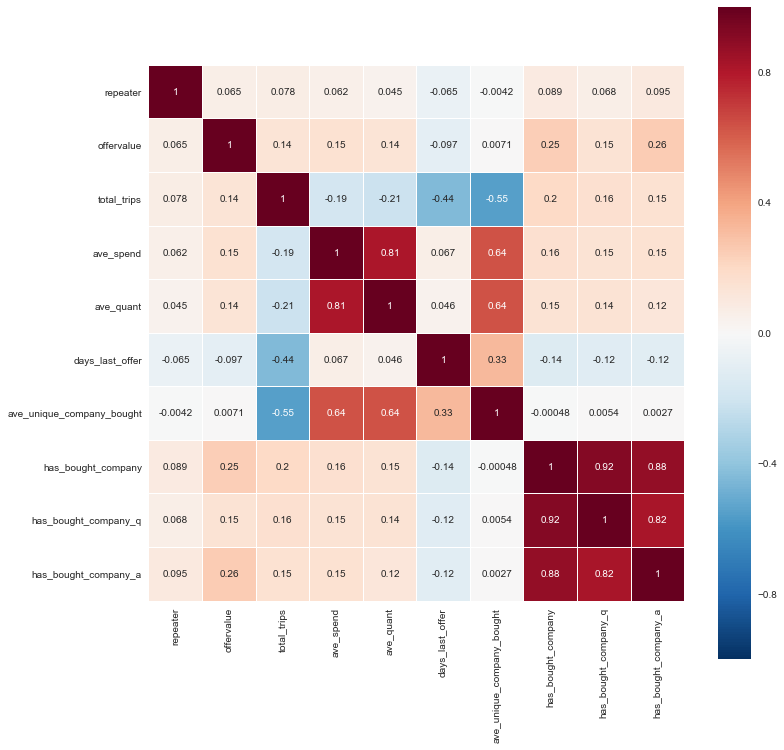

In [813]:
#Plot correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cor,square=True,linewidths=0.1,annot=True)
plt.yticks(rotation=0)

#### Relationship: 
Plot shows that "ave_spend", "ave_quant", and "ave_unique_company_bought" have high positive correlation.     
Also, "has_bought_company", "has_bought_company_q","has_bought_company_a" have high positive correlation.

In [814]:
#Draw Univariate Plots 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_plot(variable):

    ax1 = sns.countplot(variable,data=X_features)
    ax1.set_ylim(0,1200)
    ax1.grid(False)

    # Calculate Defualt Rate
    prob = X_features.groupby(variable).mean()['repeater']

    # Middle point for each bar
    xaxis=[]
    for p in ax1.patches:  #divide into single patch
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        xaxis.append(x.mean())

    # Default Rate Line
    ax2 = ax1.twinx()
    ax2.plot(xaxis,prob,'r--', label='Repeat Probability')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Repeat Purchase Probability')
    ax2.legend()
    ax2.grid(None) 

    # Annotate Defualt Rate
    for i in range(len(prob)):
        ax2.annotate('{:.1f}%'.format(prob.iloc[i]*100), (xaxis[i], prob.iloc[i]+0.025), 
                ha='center',va='bottom') # set the alignment of the text

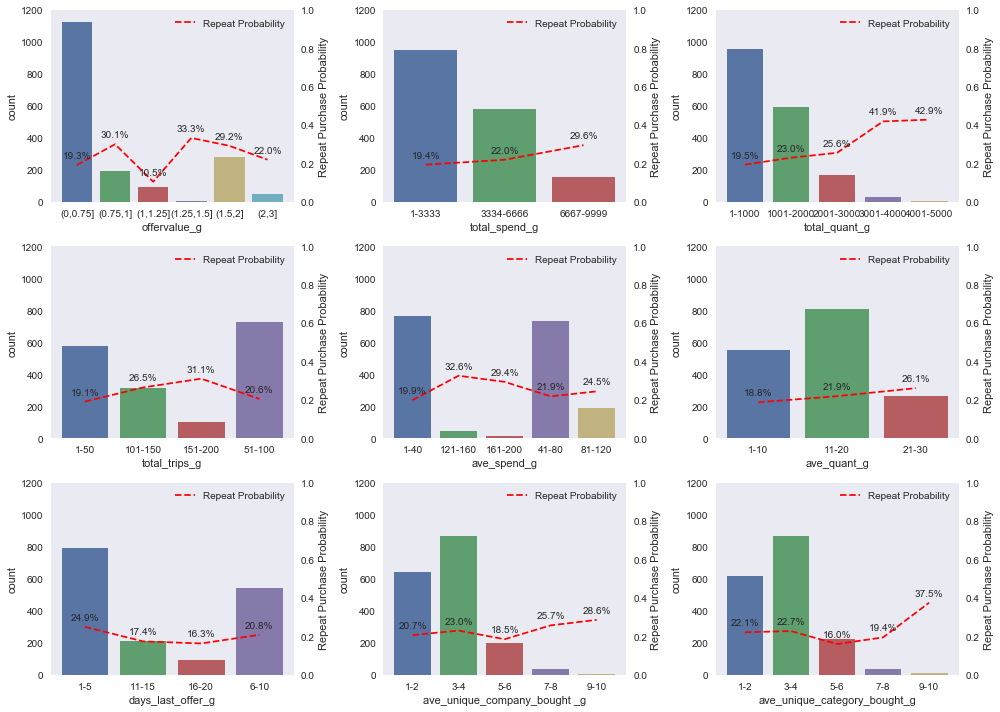

In [815]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,0.75,1,1.25,1.5,2,3]
group_names =['(0,0.75]','(0.75,1]','(1,1.25]','(1.25,1.5]','(1.5,2]','(2,3]']
X_features['offervalue_g'] = pd.cut(X_features['offervalue'],bins,labels=group_names)
draw_plot('offervalue_g')

plt.subplot(332)
bins = [0,3333,6666,9999]
group_names =['1-3333','3334-6666','6667-9999']
X_features['total_spend_g'] = pd.cut(X_features['total_spend'],bins,labels=group_names)
draw_plot('total_spend_g')

plt.subplot(333)
bins = [0,1000,2000,3000,4000,5000]
group_names =['1-1000','1001-2000','2001-3000','3001-4000','4001-5000']
X_features['total_quant_g'] = pd.cut(X_features['total_quant'],bins,labels=group_names)
draw_plot('total_quant_g')

plt.subplot(334)
bins = [0,50,100,150,200]
group_names =['1-50','51-100','101-150','151-200']
X_features['total_trips_g'] = pd.cut(X_features['total_trips'],bins,labels=group_names)
draw_plot('total_trips_g')

plt.subplot(335)
bins = [0,40,80,120,160,200]
group_names =['1-40','41-80','81-120','121-160','161-200']
X_features['ave_spend_g'] = pd.cut(X_features['ave_spend'],bins,labels=group_names)
draw_plot('ave_spend_g')

plt.subplot(336)
bins = [0,10,20,30]
group_names =['1-10','11-20','21-30']
X_features['ave_quant_g'] = pd.cut(X_features['ave_quant'],bins,labels=group_names)
draw_plot('ave_quant_g')

plt.subplot(337)
bins = [0,5,10,15,20]
group_names =['1-5','6-10','11-15','16-20']
X_features['days_last_offer_g'] = pd.cut(X_features['days_last_offer'],bins,labels=group_names)
draw_plot('days_last_offer_g')

plt.subplot(338)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['ave_unique_company_bought _g'] = pd.cut(X_features['ave_unique_company_bought'],bins,labels=group_names)
draw_plot('ave_unique_company_bought _g')

plt.subplot(339)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['ave_unique_category_bought_g'] = pd.cut(X_features['ave_unique_category_bought'],bins,labels=group_names)
draw_plot('ave_unique_category_bought_g')

plt.tight_layout()

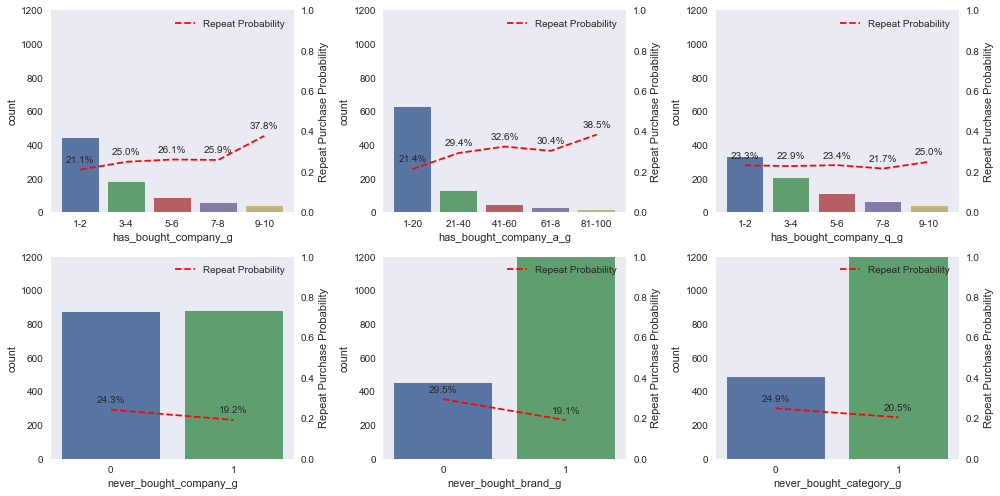

In [816]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['has_bought_company_g'] = pd.cut(X_features['has_bought_company'],bins,labels=group_names)
draw_plot('has_bought_company_g')

plt.subplot(332)
bins = [0,20,40,60,80,100]
group_names =['1-20','21-40','41-60','61-8','81-100']
X_features['has_bought_company_a_g'] = pd.cut(X_features['has_bought_company_a'],bins,labels=group_names)
draw_plot('has_bought_company_a_g')

plt.subplot(333)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['has_bought_company_q_g'] = pd.cut(X_features['has_bought_company_q'],bins,labels=group_names)
draw_plot('has_bought_company_q_g')

plt.subplot(334)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_company_g'] = pd.cut(X_features['never_bought_company'],bins,labels=group_names)
draw_plot('never_bought_company_g')

plt.subplot(335)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_brand_g'] = pd.cut(X_features['never_bought_brand'],bins,labels=group_names)
draw_plot('never_bought_brand_g')

plt.subplot(336)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_category_g'] = pd.cut(X_features['never_bought_category'],bins,labels=group_names)
draw_plot('never_bought_category_g')

plt.tight_layout()

### Algorithms  Selection<a name='Implementing Algorithms' />

- Let Y_features equals 'repater'
- Drop unnecessary features in X_features ('id','chain','offer','category','company','brand','repeater','repeattrips','offerdate')
- Split the data into training and test sets
- Tune The regularization parameters in Logistic Regression using 10 folds cross-validation and check the highest AUC score
- Implement Naive Bayes and check AUC score
- Tune the number of trees and max depth in XGBoost using 10 folds cross-validation and check the highest AUC score

**Conclusion**: Highest AUC score is for XGBoost algorithm with max_depth=4 and n_estimators=20, which is 59.03%.

In [711]:
#Predction using Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
%matplotlib inline
from matplotlib import pyplot
import numpy
#from sklearn.feature_selection import f_classif, SelectKBest
#from sklearn.pipeline import Pipeline

In [825]:
X_features = pd.read_csv('X_features.csv')
X_features.shape

(1753, 92)

In [826]:
Y_features = X_features[['id','repeater']]
Y_features['repeater'] = 1 * (Y_features['repeater'] == 't')
X_features.drop(['id','chain','offer','market','quantity','category','company','brand','repeater','repeattrips','offerdate','never_bought_company','never_bought_category','never_bought_brand'],axis=1,inplace=True)

/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [827]:
# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X_features,Y_features.repeater,test_size=0.5,random_state=3)

#### Logistic Regression

In [828]:
#Hyperparameter Tuning: tune regularization parameter in 10-fold cross-validation
model = LogisticRegression()
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]
print(C)
param_grid = dict(C=C)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_features, Y_features.repeater)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[0.03, 0.09, 0.27, 0.81, 1.0, 3.0, 9.0, 27.0, 81.0, 243.0]
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


Best: 0.571551 using {'C': 3.0}
0.560689 (0.060381) with: {'C': 0.03}
0.565400 (0.057915) with: {'C': 0.09}
0.568173 (0.053910) with: {'C': 0.27}
0.570983 (0.056093) with: {'C': 0.81}
0.570413 (0.055196) with: {'C': 1.0}
0.571551 (0.057110) with: {'C': 3.0}
0.570150 (0.056206) with: {'C': 9.0}
0.570114 (0.054384) with: {'C': 27.0}
0.569834 (0.055312) with: {'C': 81.0}
0.570644 (0.055516) with: {'C': 243.0}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


#### Gaussian Naive Bayes

In [829]:
# Fit the training model
NB = GaussianNB()
NB.fit(X_train,Y_train)

# Prediction from X_test
Y_pred = NB.predict(X_test)
prob = NB.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score is: {:.2%}'.format(score)

AUC score is: 57.45%


#### XGBoost

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.6s finished


Best: 0.590369 using {'n_estimators': 20, 'max_depth': 4}
0.586123 (0.031880) with: {'n_estimators': 5, 'max_depth': 2}
0.589812 (0.029528) with: {'n_estimators': 10, 'max_depth': 2}
0.587175 (0.029530) with: {'n_estimators': 15, 'max_depth': 2}
0.576876 (0.026797) with: {'n_estimators': 20, 'max_depth': 2}
0.571823 (0.039829) with: {'n_estimators': 5, 'max_depth': 4}
0.570506 (0.037144) with: {'n_estimators': 10, 'max_depth': 4}
0.577829 (0.035116) with: {'n_estimators': 15, 'max_depth': 4}
0.590369 (0.041388) with: {'n_estimators': 20, 'max_depth': 4}
0.557676 (0.038467) with: {'n_estimators': 5, 'max_depth': 6}
0.561769 (0.042354) with: {'n_estimators': 10, 'max_depth': 6}
0.559618 (0.052611) with: {'n_estimators': 15, 'max_depth': 6}
0.568080 (0.059684) with: {'n_estimators': 20, 'max_depth': 6}
0.569927 (0.045418) with: {'n_estimators': 5, 'max_depth': 8}
0.558079 (0.047101) with: {'n_estimators': 10, 'max_depth': 8}
0.563709 (0.061355) with: {'n_estimators': 15, 'max_depth': 8}
0

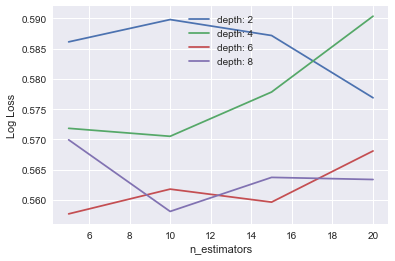

In [830]:
#Hyperparameter Tuning: tune The Number of Trees and Max Depth in XGBoost (10 foldes cross-validation)
# grid search
model = XGBClassifier()
n_estimators = [5, 10, 15, 20]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_features, Y_features.repeater)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
